# Chromosome generation test

In [1]:
from random import choice

from src.ga.chromosome.vent_hole import VentHole
from src.ga.gene.shape.shape_variations import (
    circle_params,
    flower_params,
    parabola_x_right_inner_multi_params,
    rose_params,
    triangle_params,
    triple_rectangle_params,
    wing_params,
    trapezoid_params,
    diamond_params,
    hexagon_params,
    parabola_x_right_inner_params,
    arrow_params,
)

from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)
from src.ga.gene.shape.shape_gene import ShapeGene
from src.ga.gene.pattern.pattern_gene import PatternGene

vent_list: list[VentHole] = []

COUNT = 100
SCALE = 1
RAND_SHAPE = [
    # circle_params,
    # triangle_params,
    # wing_params,
    # trapezoid_params,
    # diamond_params,
    # hexagon_params,
    # parabola_x_right_inner_params,
    # parabola_x_right_inner_multi_params,
    # arrow_params,
    flower_params,
    rose_params,
    # triple_rectangle_params,
]
RAND_PATTERN = [
    circular_params,
    corn_params,
    grid_params,
]

shape_genes: list[ShapeGene] = []
pattern_genes: list[PatternGene] = []

# RESET STORAGE
ShapeGene.pdf_storage.reset()
PatternGene.pdf_storage.reset()
ShapeGene.parameter_storage.reset()

# GENERATE RANDOM GENES
for i in range(COUNT):
    shape_selection = choice(RAND_SHAPE)
    pattern_selection = choice(RAND_PATTERN)

    shape_gene = ShapeGene(shape_selection(SCALE), gene_id=i)
    pattern_gene = PatternGene(pattern_selection(SCALE), gene_id=i)

    shape_gene.mutate("rand")
    pattern_gene.mutate("rand")

    pattern_genes.append(pattern_gene)
    shape_genes.append(shape_gene)

# SAVE GENES
ShapeGene.pdf_storage.save()
PatternGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

# MUTATE GENES
for i in range(COUNT):
    rand_vent = VentHole(
        vent_id=i,
        gene_tuple=(
            shape_genes[i],
            pattern_genes[i],
        ),
        pattern_bound=((-35 * SCALE, 35 * SCALE), (-35 * SCALE, 35 * SCALE)),
    )
    rand_vent.mutate_genes()

    vent_list.append(rand_vent)


ShapeGene.pdf_storage.save()
PatternGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/gene_parameters.json
[Storage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_1_update/store/pattern_gene_pdf.json
[StochasticS

# Crossover test

In [2]:
# Crossover
from src.ga.p4_crossover.behaviors import (
    one_point_crossover,
)

child_vent_list: list[VentHole] = []

for i in range(COUNT - 1):
    child_vent = vent_list[i].crossover(
        one_point_crossover,
        vent_list[i + 1],
    )

    child_vent_list.append(child_vent)

# Visualization test

{'FlowerShape_1': array([2.10801681, 4.99895494]), 'CornerTransformation_0': array([10.76093161,  9.69903055,  0.5527149 ,  5.        ])}


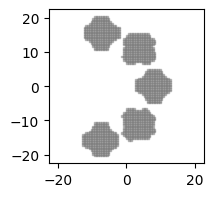

{'FlowerShape_1': array([2.10801681, 4.99895494]), 'CircularStrictTransformation_1': array([13.5398758 ,  2.24005738,  0.52359878])}


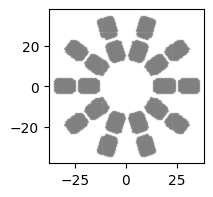

{'FlowerShape_2': array([5.05690047, 2.2575548 ]), 'CornerTransformation_3': array([12.47033972,  6.4013707 ,  0.66511644,  2.        ])}


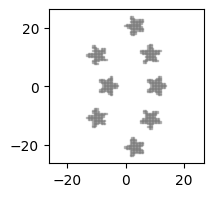

{'RoseShape_4': array([13.84605105,  2.46059421]), 'CornerTransformation_3': array([12.47033972,  6.4013707 ,  0.66511644,  2.        ])}


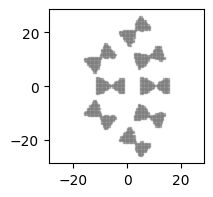

{'RoseShape_4': array([13.84605105,  2.46059421]), 'CornerTransformation_5': array([10.4671266 ,  4.74202435,  0.36369009,  3.        ])}


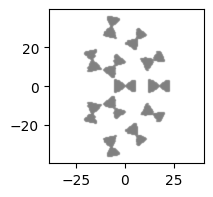

{'FlowerShape_5': array([6.95914274, 3.22838771]), 'CornerTransformation_5': array([10.4671266 ,  4.74202435,  0.36369009,  3.        ])}


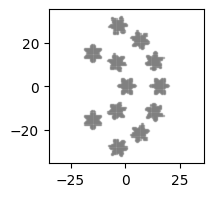

{'RoseShape_6': array([12.38489018,  2.46059421]), 'CornerTransformation_6': array([13.78721912,  2.97505461,  0.32126353,  2.        ])}


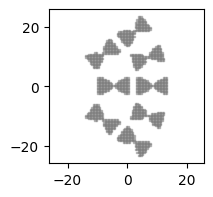

{'RoseShape_8': array([12.38489018,  3.91557006]), 'CornerTransformation_7': array([7.51801242, 4.06604267, 0.60956565, 3.        ])}


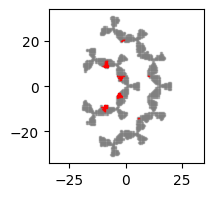

{'RoseShape_8': array([12.38489018,  3.91557006]), 'CircularStrictTransformation_9': array([10.63887545,  5.33342021,  0.52359878])}


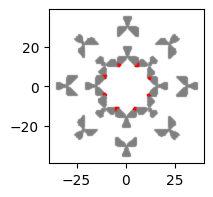

{'RoseShape_9': array([9.46208092, 5.99716625]), 'CircularStrictTransformation_9': array([10.63887545,  5.33342021,  0.52359878])}


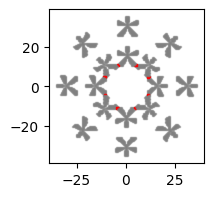

{'FlowerShape_10': array([2.10363456, 2.66733049]), 'GridStrictTransformation_10': array([4.97536228, 1.45267131])}


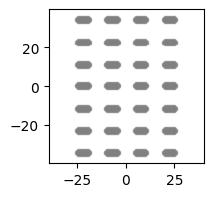

{'FlowerShape_11': array([2.10363456, 2.70838989]), 'GridStrictTransformation_11': array([8.18684286, 0.63367849])}


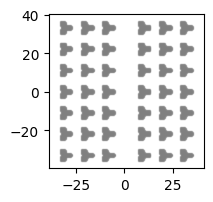

{'RoseShape_13': array([14.7606854 ,  5.12774104]), 'GridStrictTransformation_12': array([9.69903055, 0.63367849])}


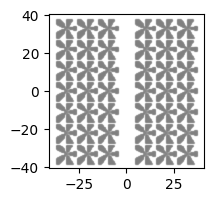

{'RoseShape_13': array([14.7606854 ,  5.12774104]), 'GridStrictTransformation_13': array([0.80736722, 2.62700106])}


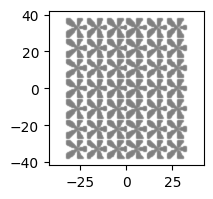

{'FlowerShape_14': array([4.93372426, 3.75524649]), 'CornerTransformation_14': array([14.73610576,  9.79698854,  0.54979531,  4.        ])}


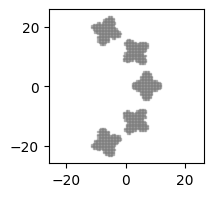

{'RoseShape_15': array([13.41755049,  3.55972775]), 'CircularStrictTransformation_16': array([10.94416766,  5.26544083,  0.62831853])}


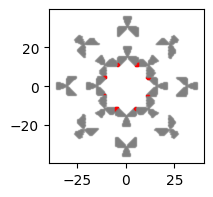

{'RoseShape_16': array([10.37799908,  4.13602218]), 'CircularStrictTransformation_16': array([10.94416766,  5.26544083,  0.62831853])}


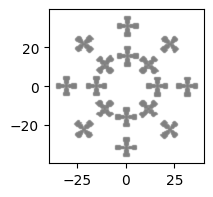

{'RoseShape_17': array([10.37799908,  6.64640616]), 'GridStrictTransformation_17': array([8.85266819, 5.18613305])}


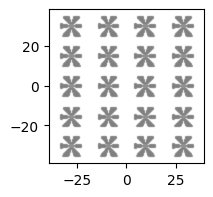

{'FlowerShape_19': array([3.73791152, 3.99508717]), 'GridStrictTransformation_18': array([7.96361613, 9.59095044])}


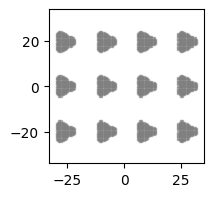

{'FlowerShape_19': array([3.73791152, 3.99508717]), 'GridStrictTransformation_20': array([6.3106803 , 0.73918769])}


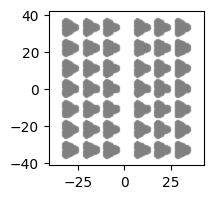

{'RoseShape_21': array([8.51525795, 5.88777272]), 'GridStrictTransformation_20': array([6.3106803 , 0.73918769])}


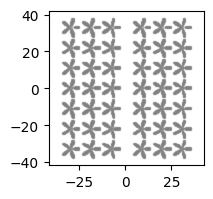

{'RoseShape_21': array([8.51525795, 5.88777272]), 'GridStrictTransformation_22': array([3.14818319, 0.71957286])}


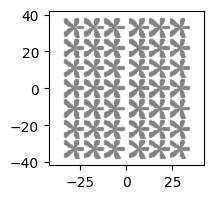

{'FlowerShape_23': array([2.10990478, 2.6625433 ]), 'GridStrictTransformation_22': array([3.14818319, 0.71957286])}


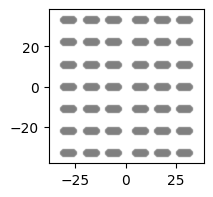

{'FlowerShape_23': array([2.10990478, 2.6625433 ]), 'CornerTransformation_24': array([14.97887018,  5.28810687,  0.50460507,  4.        ])}


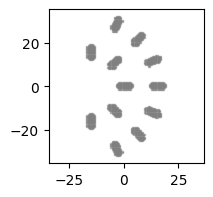

{'FlowerShape_25': array([1.1851539 , 4.65498884]), 'CornerTransformation_24': array([14.97887018,  5.28810687,  0.50460507,  4.        ])}


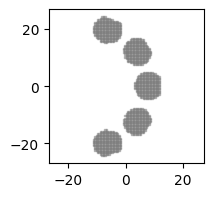

{'FlowerShape_25': array([1.1851539 , 4.65498884]), 'GridStrictTransformation_25': array([0.54179837, 8.16395206])}


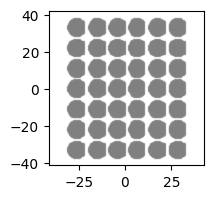

{'RoseShape_26': array([14.80889586,  5.72231355]), 'GridStrictTransformation_27': array([4.91508548, 9.59095044])}


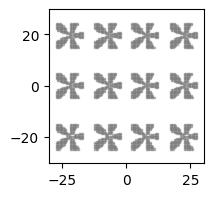

{'RoseShape_27': array([14.80889586,  4.60884521]), 'GridStrictTransformation_27': array([4.91508548, 9.59095044])}


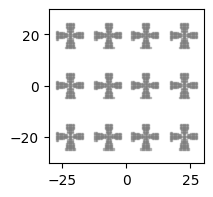

{'FlowerShape_29': array([6.95914274, 3.51566528]), 'CircularStrictTransformation_28': array([11.26928998,  7.06088427,  0.78539816])}


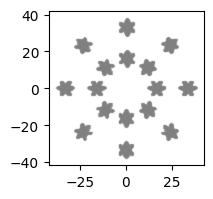

{'FlowerShape_29': array([6.95914274, 3.51566528]), 'CircularStrictTransformation_30': array([8.35157336, 0.83595691, 0.52359878])}


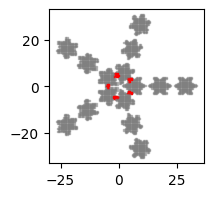

{'FlowerShape_31': array([3.63404733, 4.52531968]), 'CircularStrictTransformation_30': array([8.35157336, 0.83595691, 0.52359878])}


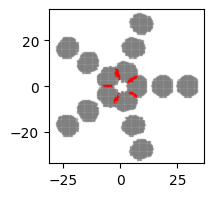

{'FlowerShape_31': array([3.63404733, 4.52531968]), 'GridStrictTransformation_32': array([1.12556134, 6.55212162])}


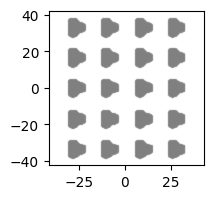

{'RoseShape_33': array([10.88406025,  4.93169197]), 'GridStrictTransformation_32': array([1.12556134, 6.55212162])}


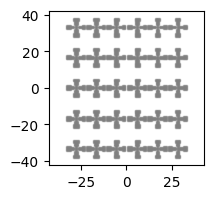

{'RoseShape_33': array([10.88406025,  4.93169197]), 'CornerTransformation_34': array([7.65693856, 7.11237489, 0.50010979, 3.        ])}


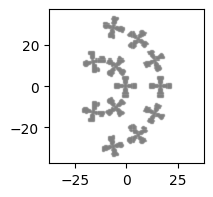

{'FlowerShape_34': array([5.1771152 , 4.61282418]), 'CornerTransformation_34': array([7.65693856, 7.11237489, 0.50010979, 3.        ])}


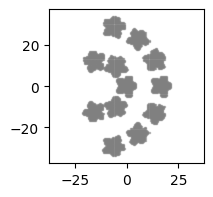

{'RoseShape_35': array([8.72821084, 5.89699647]), 'CornerTransformation_35': array([11.78396186,  1.64406418,  0.31488624,  5.        ])}


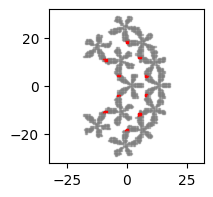

{'FlowerShape_36': array([6.007513  , 4.73903711]), 'GridStrictTransformation_36': array([1.17411116, 3.69591211])}


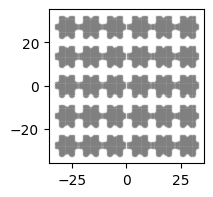

{'FlowerShape_37': array([6.007513  , 4.98836327]), 'CircularStrictTransformation_37': array([10.4671266 ,  1.76135093,  0.57119866])}


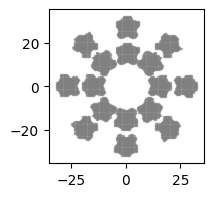

{'FlowerShape_39': array([6.007513  , 4.14829665]), 'CornerTransformation_38': array([7.56811699, 1.8871047 , 0.58135954, 4.        ])}


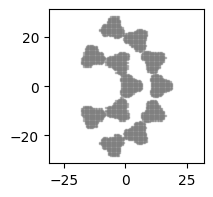

{'FlowerShape_39': array([6.007513  , 4.14829665]), 'GridStrictTransformation_40': array([9.79893149, 9.59095044])}


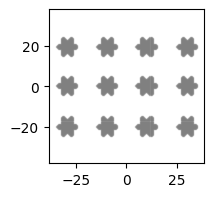

{'RoseShape_40': array([14.7467881 ,  6.82780819]), 'GridStrictTransformation_40': array([9.79893149, 9.59095044])}


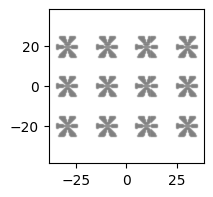

{'RoseShape_42': array([5.09641998, 4.43229108]), 'CornerTransformation_41': array([12.23548923,  1.73517736,  0.63479163,  3.        ])}


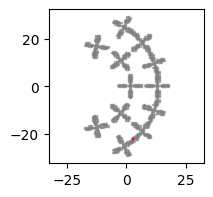

{'RoseShape_42': array([5.09641998, 4.43229108]), 'CornerTransformation_43': array([10.58859392,  5.2134519 ,  0.59667931,  3.        ])}


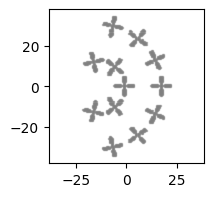

{'RoseShape_44': array([7.13017746, 5.83624771]), 'CornerTransformation_43': array([10.58859392,  5.2134519 ,  0.59667931,  3.        ])}


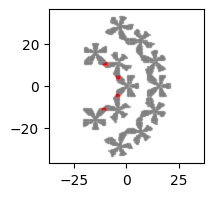

{'RoseShape_44': array([7.13017746, 5.83624771]), 'CornerTransformation_44': array([12.3493652 ,  6.72069713,  0.46444999,  4.        ])}


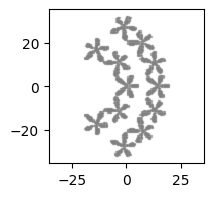

{'RoseShape_45': array([9.9861185 , 6.82780819]), 'GridStrictTransformation_45': array([4.44936869, 4.69902131])}


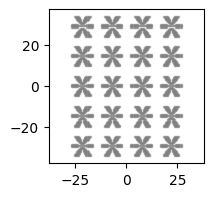

{'FlowerShape_46': array([1.49797192, 3.4050089 ]), 'GridStrictTransformation_47': array([9.83644752, 7.78000765])}


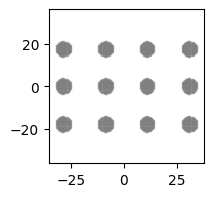

{'FlowerShape_47': array([1.65176191, 3.69768393]), 'GridStrictTransformation_47': array([9.83644752, 7.78000765])}


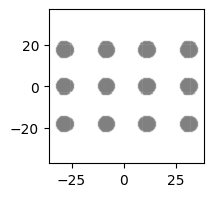

{'RoseShape_49': array([7.55022117, 6.420239  ]), 'CornerTransformation_48': array([14.99835959,  1.88832007,  0.63783006,  2.        ])}


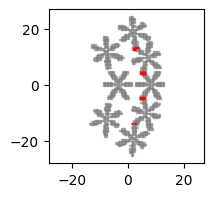

{'RoseShape_49': array([7.55022117, 6.420239  ]), 'GridStrictTransformation_50': array([6.81462714, 8.16395206])}


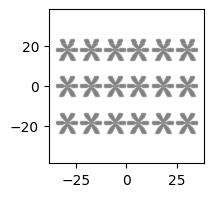

{'FlowerShape_50': array([1.49797192, 4.13541105]), 'GridStrictTransformation_50': array([6.81462714, 8.16395206])}


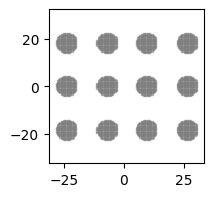

{'RoseShape_51': array([13.32612759,  2.26668547]), 'GridStrictTransformation_51': array([4.97536228, 1.1279379 ])}


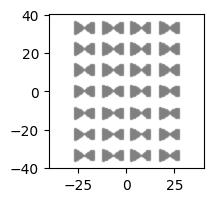

{'FlowerShape_53': array([2.95028874, 3.7884388 ]), 'CircularStrictTransformation_52': array([8.26773274, 8.30878902, 0.41887902])}


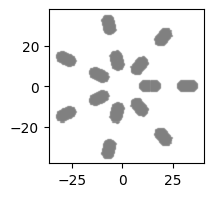

{'FlowerShape_53': array([2.95028874, 3.7884388 ]), 'CircularStrictTransformation_54': array([11.27165636,  5.17089096,  0.6981317 ])}


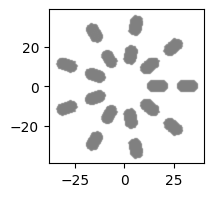

{'RoseShape_54': array([5.09053079, 2.26668547]), 'CircularStrictTransformation_54': array([11.27165636,  5.17089096,  0.6981317 ])}


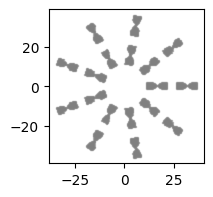

{'FlowerShape_55': array([1.95155448, 3.22838771]), 'CornerTransformation_55': array([9.15622291, 1.79982118, 0.54029619, 4.        ])}


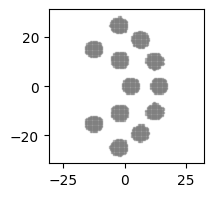

{'RoseShape_56': array([9.87064679, 2.35760042]), 'CircularStrictTransformation_56': array([7.50373133, 2.27735905, 0.44879895])}


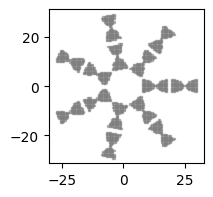

{'RoseShape_58': array([14.44628622,  4.85222562]), 'GridStrictTransformation_57': array([2.56522408, 7.42949044])}


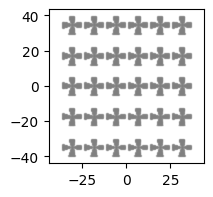

{'RoseShape_58': array([14.44628622,  4.85222562]), 'GridStrictTransformation_59': array([5.08101856, 9.59095044])}


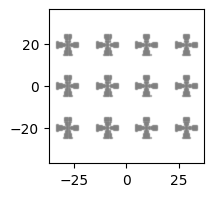

{'FlowerShape_59': array([1.1851539 , 4.99895494]), 'GridStrictTransformation_59': array([5.08101856, 9.59095044])}


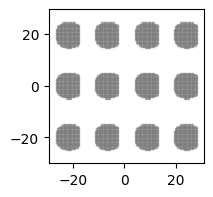

{'FlowerShape_60': array([4.80435376, 4.39905074]), 'CornerTransformation_60': array([12.18940342,  2.2938943 ,  0.41743699,  2.        ])}


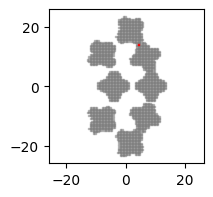

{'RoseShape_62': array([12.56689664,  6.94597159]), 'CircularStrictTransformation_61': array([14.72565519,  1.29830074,  0.57119866])}


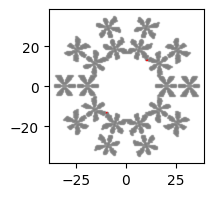

{'RoseShape_62': array([12.56689664,  6.94597159]), 'GridStrictTransformation_63': array([8.43006797, 5.18613305])}


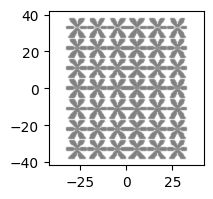

{'FlowerShape_63': array([1.31439509, 2.46647841]), 'GridStrictTransformation_63': array([8.43006797, 5.18613305])}


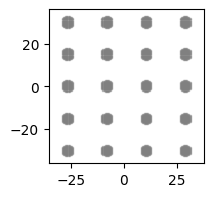

{'RoseShape_65': array([14.7467881,  3.6271589]), 'CircularStrictTransformation_64': array([7.87945358, 7.62232085, 0.78539816])}


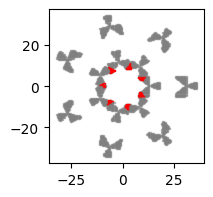

{'RoseShape_65': array([14.7467881,  3.6271589]), 'GridStrictTransformation_65': array([9.04070046, 2.62700106])}


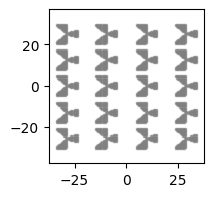

{'RoseShape_66': array([5.01939587, 6.94597159]), 'CircularStrictTransformation_67': array([8.89456212, 4.94127071, 0.34906585])}


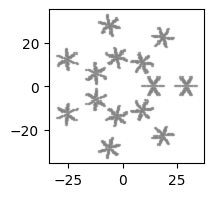

{'RoseShape_68': array([10.13960027,  4.02521378]), 'CircularStrictTransformation_67': array([8.89456212, 4.94127071, 0.34906585])}


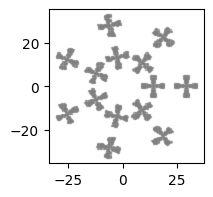

{'RoseShape_68': array([10.13960027,  4.02521378]), 'CornerTransformation_69': array([9.06379978, 9.69903055, 0.32126353, 5.        ])}


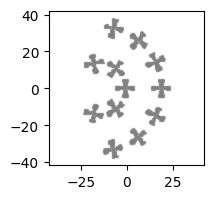

{'RoseShape_70': array([14.7606854 ,  4.83646109]), 'CornerTransformation_69': array([9.06379978, 9.69903055, 0.32126353, 5.        ])}


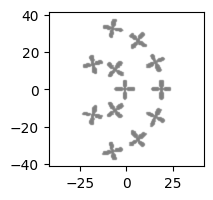

{'RoseShape_70': array([14.7606854 ,  4.83646109]), 'GridStrictTransformation_71': array([9.90824316, 5.70468034])}


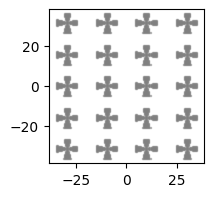

{'FlowerShape_71': array([4.27178809, 3.85801027]), 'GridStrictTransformation_71': array([9.90824316, 5.70468034])}


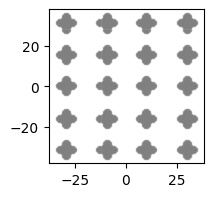

{'FlowerShape_73': array([1.49797192, 4.92345434]), 'CornerTransformation_72': array([8.14390675, 0.72636575, 0.72402471, 2.        ])}


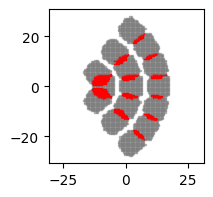

{'FlowerShape_73': array([1.49797192, 4.92345434]), 'GridStrictTransformation_74': array([1.12556134, 2.8017543 ])}


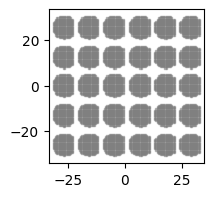

{'FlowerShape_74': array([3.70826293, 3.77669256]), 'GridStrictTransformation_74': array([1.12556134, 2.8017543 ])}


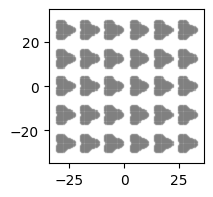

{'RoseShape_75': array([5.01939587, 2.35760042]), 'CircularStrictTransformation_75': array([10.00666465,  1.17634279,  0.28559933])}


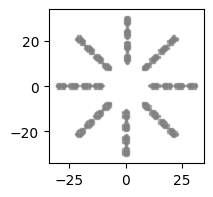

{'FlowerShape_77': array([3.64799744, 4.01547218]), 'CircularStrictTransformation_76': array([11.5971064 ,  2.27735905,  0.57119866])}


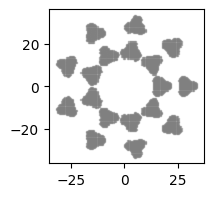

{'FlowerShape_77': array([3.64799744, 4.01547218]), 'CircularStrictTransformation_78': array([7.56811699, 6.53283593, 0.48332195])}


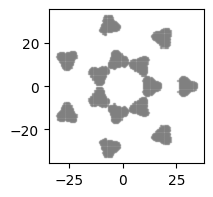

{'FlowerShape_79': array([1.31439509, 2.66917468]), 'CircularStrictTransformation_78': array([7.56811699, 6.53283593, 0.48332195])}


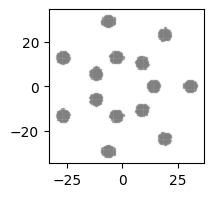

{'FlowerShape_79': array([1.31439509, 2.66917468]), 'CornerTransformation_79': array([12.20720174,  6.12370267,  0.43356024,  4.        ])}


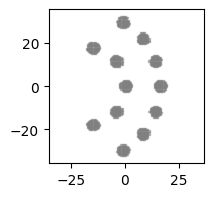

{'RoseShape_80': array([5.01939587, 5.28701218]), 'CornerTransformation_81': array([12.20720174,  6.12370267,  0.6628302 ,  6.        ])}


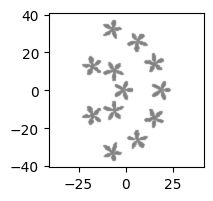

{'RoseShape_82': array([14.2472108 ,  6.06970079]), 'CornerTransformation_81': array([12.20720174,  6.12370267,  0.6628302 ,  6.        ])}


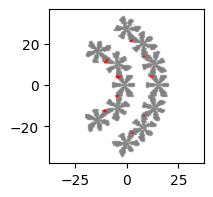

{'RoseShape_82': array([14.2472108 ,  6.06970079]), 'GridStrictTransformation_82': array([4.15988435, 3.36955823])}


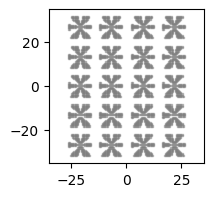

{'RoseShape_83': array([14.45974997,  2.35760042]), 'CornerTransformation_83': array([8.7497156 , 8.84815026, 0.48349641, 6.        ])}


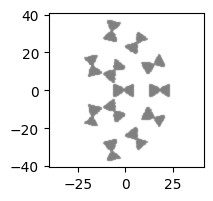

{'FlowerShape_84': array([3.16308353, 3.32944375]), 'GridStrictTransformation_84': array([2.70591374, 3.61773512])}


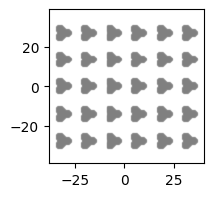

{'FlowerShape_85': array([5.57556259, 4.22210533]), 'CircularStrictTransformation_85': array([12.4505801 ,  9.79893149,  0.62831853])}


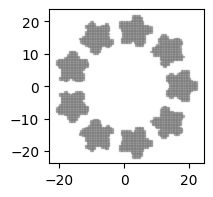

{'FlowerShape_86': array([1.34892675, 4.20105012]), 'CornerTransformation_86': array([14.06486545,  2.19608871,  0.49518183,  3.        ])}


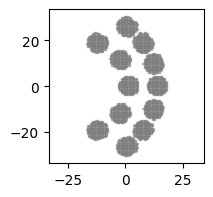

{'RoseShape_87': array([14.80889586,  4.07878035]), 'GridStrictTransformation_88': array([5.61854094, 7.77950912])}


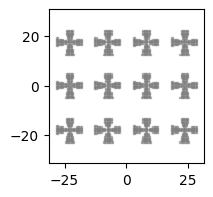

{'RoseShape_89': array([9.96304653, 5.99716625]), 'GridStrictTransformation_88': array([5.61854094, 7.77950912])}


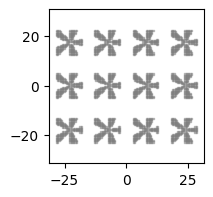

{'RoseShape_89': array([9.96304653, 5.99716625]), 'CornerTransformation_89': array([11.1853728 ,  8.81035389,  0.41547138,  2.        ])}


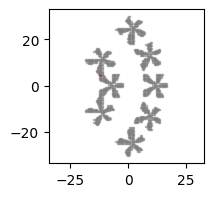

{'RoseShape_90': array([14.7467881 ,  2.26668547]), 'CircularStrictTransformation_91': array([7.56811699, 7.47158058, 0.6981317 ])}


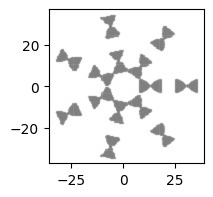

{'RoseShape_91': array([8.44073018, 2.35760042]), 'CircularStrictTransformation_91': array([7.56811699, 7.47158058, 0.6981317 ])}


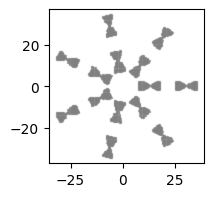

{'FlowerShape_93': array([1.31439509, 4.83757519]), 'GridStrictTransformation_92': array([6.38968216, 0.71957286])}


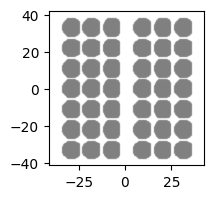

{'FlowerShape_93': array([1.31439509, 4.83757519]), 'CornerTransformation_93': array([10.72548202,  8.97516646,  0.41743699,  2.        ])}


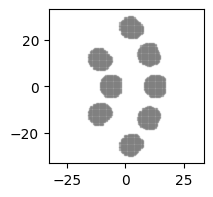

{'RoseShape_94': array([6.96984995, 5.11441418]), 'GridStrictTransformation_94': array([2.40925803, 2.29104399])}


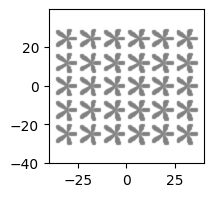

{'RoseShape_95': array([14.80889586,  4.97762949]), 'CornerTransformation_95': array([8.50799503, 3.52778191, 0.28320429, 2.        ])}


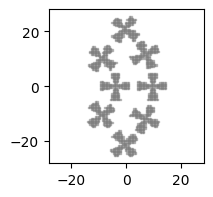

{'FlowerShape_96': array([5.02497275, 2.39874331]), 'CircularStrictTransformation_97': array([9.77272191, 1.41692134, 0.78539816])}


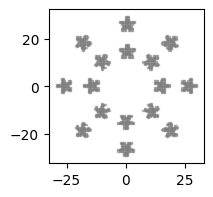

{'RoseShape_98': array([7.35254898, 2.28091186]), 'CircularStrictTransformation_97': array([9.77272191, 1.41692134, 0.78539816])}


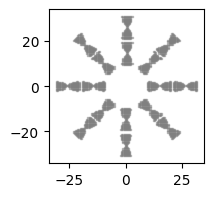

{'RoseShape_98': array([7.35254898, 2.28091186]), 'CircularStrictTransformation_98': array([8.89492321, 4.20639449, 0.52359878])}


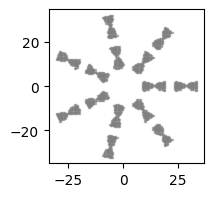

In [3]:
from src.grid.visualize_points import visualize_points


for i in range(COUNT - 1):
    print(child_vent_list[i].gene_parameter_table)
    visualize_points(
        child_vent_list[i].pattern.pattern_matrix,
        child_vent_list[i].pattern.pattern_unit.grid.k,
        fig_size=(2, 2),
    )